In [499]:
# 0. importing packages
import pandas as pd
from plotnine import *
from numpy import *

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [500]:
# 0. importing original dataset
# https://www.kaggle.com/datasets/timmate/avocado-prices-2020

df_avo = pd.read_csv("/Users/andriy/Desktop/GSB544_ML/Week_1&2/Lab_2/avocado-updated-2020.csv")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [501]:
# 1. viewing dataset

# df_avo.head()
# df_avo.info()
# df_avo.describe()

# print(df_avo['geography'].unique())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


1. The file contains data on avocado sales in the US from 2015 to 2020

# Data types:
 RangeIndex: 33045 entries, 0 to 33044
 Data columns (total 13 columns):
 N   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
 dtypes: float64(9), int64(1), object(3)


# Data fields description:
    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of Small/Medium Hass Avocado with PLU 4046 sold
    4225 - Total number of Large Hass Avocado with PLU 4225 sold
    4770 - Total number of Extra Large Hass Avocado with PLU 4770 sold

# Unique geographies:
    'Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
    'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
    'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England' 'Orlando' 'Philadelphia'
    'Phoenix/Tucson' 'Pittsburgh' 'Plains' 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke'
    'Sacramento' 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central' 'Southeast'
    'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West' 'West Tex/New Mexico'

The data is not tidy:
- type organic or conventional is mixed in 1 column. Can be solved with boolean masking. 
- the cities are mixed up in one column with regions, ie. one entry is part of the other (sum)
-- regions present: 'Midsouth', 'Northeast', 'Southeast', 'West'
-- states summarized: 'California'. Note: assuming 'New York' represents a city (not a state) as there is not other mention of New York City in the dataset.

In [502]:
# 2. Cleaning the data
# a. rename sizes columns
df_avo.rename(columns={'4046':'4046_SM', '4225':'4225_L', '4770':'4770_XL'}, inplace = True)
# b. adding boolean masking for category type: 'organic' (1 - organic, 0 - conventional)
df_avo['organic'] = 1 * (df_avo['type'] == 'organic')

# c. converting 'date' to datetime objects to further extract data month and year
df_avo['datetime'] = pd.to_datetime(df_avo['date'])
df_avo['day']=df_avo['datetime'].dt.month
df_avo['month']=df_avo['datetime'].dt.month
df_avo['year']=df_avo['datetime'].dt.year # year info already present in the dataset

# d. creating new dataset filtered to four main regions
four_regions = ['Midsouth', 'Northeast', 'Southeast', 'West']
df_avo_four_regions = df_avo[df_avo['geography'].isin(four_regions)]

# e. creating new dataset filtered to cities only (to avoid doublecounts with 'four regions', 'Total U.S.' and 'California', and other sub regional areas)
non_cities = ['Midsouth', 'Northeast', 'Southeast', 'West', 'California', 'Total U.S.', 'South Central', 'Great Lakes', 'Plains', 'Northern New England']
df_avo_cities = df_avo[~df_avo['geography'].isin(non_cities)]

#df_avo_california
#df_avo_four_regions

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [503]:
df_avo_cities

,date,average_price,total_volume,4046_SM,4225_L,4770_XL,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,organic,datetime,day,month
0,2015-01-04,1,40873,2820,28287,50,9716,9187,530,0,conventional,2015,Albany,0,2015-01-04,1,1
1,2015-01-04,2,1374,57,154,0,1163,1163,0,0,organic,2015,Albany,1,2015-01-04,1,1
2,2015-01-04,1,435021,364302,23821,82,46816,16707,30109,0,conventional,2015,Atlanta,0,2015-01-04,1,1
3,2015-01-04,2,3847,1500,938,0,1408,1071,337,0,organic,2015,Atlanta,1,2015-01-04,1,1
4,2015-01-04,1,788025,53987,552906,39995,141137,137146,3991,0,conventional,2015,Baltimore/Washington,0,2015-01-04,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33036,2020-11-29,1,3192,166,90,0,2935,2619,317,0,organic,2020,Syracuse,1,2020-11-29,11,11
33037,2020-11-29,1,562437,230469,15290,45,316634,251659,64928,47,conventional,2020,Tampa,0,2020-11-29,11,11
33038,2020-11-29,1,11884,102,0,0,11782,11782,0,0,organic,2020,Tampa,1,2020-11-29,11,11
33043,2020-11-29,1,822819,234688,80205,10544,497382,285764,210808,810,conventional,2020,West Tex/New Mexico,0,2020-11-29,11,11


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [504]:
df_avo_four_regions

,date,average_price,total_volume,4046_SM,4225_L,4770_XL,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,organic,datetime,day,month
50,2015-01-04,1,2578275,575245,1311503,181059,510468,429167,80987,315,conventional,2015,Midsouth,0,2015-01-04,1,1
51,2015-01-04,2,58065,10050,25228,3673,19114,17281,1834,0,organic,2015,Midsouth,1,2015-01-04,1,1
58,2015-01-04,1,3759283,126641,2860710,7580,764352,669970,94381,0,conventional,2015,Northeast,0,2015-01-04,1,1
59,2015-01-04,2,48280,4477,22389,23,21391,21380,12,0,organic,2015,Northeast,1,2015-01-04,1,1
92,2015-01-04,1,3204112,2296069,320374,18938,568731,287820,280911,0,conventional,2015,Southeast,0,2015-01-04,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32996,2020-11-29,2,215436,12493,22167,29,180748,162466,18251,30,organic,2020,Northeast,1,2020-11-29,11,11
33029,2020-11-29,1,5074329,2288488,169801,1876,2614149,2187694,408444,18010,conventional,2020,Southeast,0,2020-11-29,11,11
33030,2020-11-29,1,141358,1150,5916,48,134245,79452,37802,16990,organic,2020,Southeast,1,2020-11-29,11,11
33041,2020-11-29,1,5811114,1352878,589062,19742,3790665,2197611,1531530,61524,conventional,2020,West,0,2020-11-29,11,11


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


# Exercises

## 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [505]:
# Perform the groupby and sum operation # note: includes suggestions from ChatGPT
four_reg_2017 = df_avo_four_regions[df_avo_four_regions['year'] == 2017].groupby('geography').sum(numeric_only=True)


# Disable scientific notation in pandas # note: based on suggestion from ChatGPT
pd.set_option('display.float_format', '{:.0f}'.format)

# Display the result
print(four_reg_2017)

           average_price  total_volume   4046_SM    4225_L  4770_XL  total_bags  small_bags  large_bags  xlarge_bags    year  organic  day  month
geography                                                                                                                                        
Midsouth             161     165553551  35422708  68600035  1773085    59757665    50400084     8758284       599296  213802       53  692    692
Northeast            180     224647301  14531066 142179312  1780119    66156804    55462992    10010555       683260  213802       53  692    692
Southeast            160     196737252 105912021  27503743   357361    62964125    38187594    23295136      1481392  213802       53  692    692
West                 147     345054416 119268930  76871667  5973364   142940456    85436856    57196822       306777  213802       53  692    692
           average_price  total_volume   4046_SM    4225_L  4770_XL  total_bags  small_bags  large_bags  xlarge_bags    year

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


### Answer 3: 'West' region sold the most 4046 small/medium avovcado in 2017: 119268930

## 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

Date was split earlier into day, month, year in #2. cleaning the data section

In [506]:
# using city-filtered data to avoid double-count
df_avo_cities.groupby('month')['total_volume'].mean().sort_values(ascending = False)

month
5    329766
2    321418
6    307667
4    297616
3    290931
1    289092
7    286730
8    278428
9    267588
10   250319
11   243686
12   238035
Name: total_volume, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


### Answer 4: 
'Month 5' (May) has the highest average of total avocado sales: 329766

## 5. Which metro area geographical regions sold the most total avocados? 
Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [507]:
# checking top total sales in cities
df_avo_cities.groupby('geography')['total_volume'].sum().sort_values(ascending=False).head(5)

geography
Los Angeles        959350488
New York           528245244
Dallas/Ft. Worth   436204161
Houston            420843847
Phoenix/Tucson     382523414
Name: total_volume, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


### Answer:
Top 5 metro regions with total_volume sales:

Los Angeles: 959350488

New York: 528245244

Dallas/Ft. Worth: 436204161

Houston: 420843847

Phoenix/Tucson: 382523414

Out of top five metro areas, Los Angeles sold the most avocado in total: 959350488



In [508]:
# creating filtered data set for 'five metro areas' = 'Dallas/Ft. Worth', 'Houston', 'Los Angeles', 'Phoenix/Tucson', 'New York'
top_five_metro = ['Dallas/Ft. Worth', 'Houston', 'Los Angeles', 'Phoenix/Tucson', 'New York']

df_avo_five_metro = df_avo[df_avo['geography'].isin(top_five_metro)]
# df_avo_five_metro

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [509]:
df_avo_five_metro['total_volume'].min()

np.float64(4881.79)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [510]:
five_metro_sales_total = df_avo_five_metro.groupby('geography')['total_volume'].sum().sort_values(ascending=False).reset_index()
five_metro_sales_total

,geography,total_volume
0,Los Angeles,959350488
1,New York,528245244
2,Dallas/Ft. Worth,436204161
3,Houston,420843847
4,Phoenix/Tucson,382523414


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [511]:
five_metro_sales_average = df_avo_five_metro.groupby('geography')['total_volume'].mean().sort_values(ascending=False).reset_index()
five_metro_sales_average

,geography,total_volume
0,Los Angeles,1567566
1,New York,863146
2,Dallas/Ft. Worth,712752
3,Houston,687653
4,Phoenix/Tucson,625038


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


### box plot of top five metro areas by total_volume

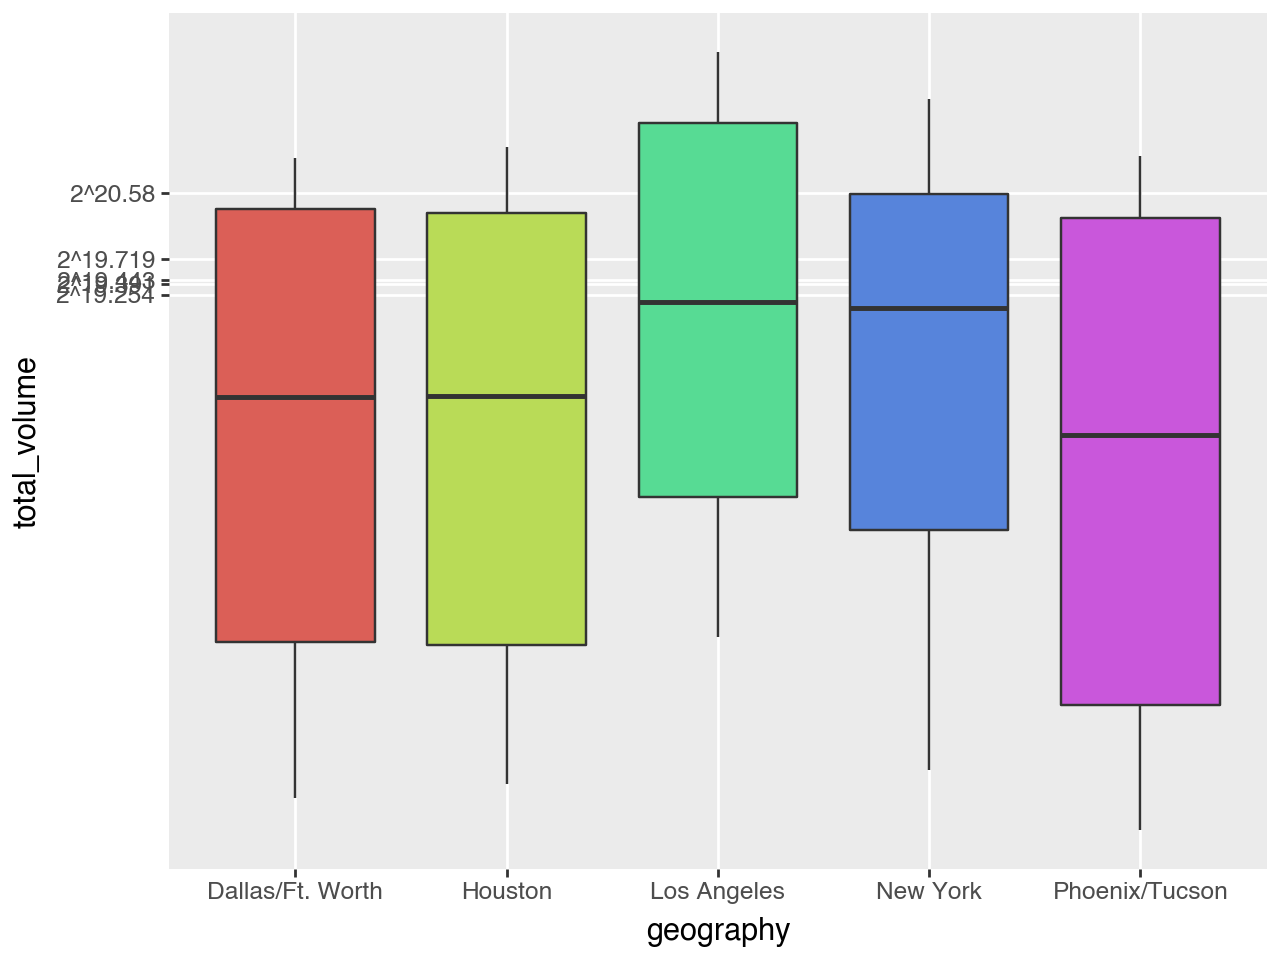

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [512]:
(ggplot(df_avo_five_metro,aes (x = 'geography', y = 'total_volume', fill = 'geography'))
+ geom_boxplot()
+ scale_y_continuous(trans = 'log2',
    limits = (df_avo_five_metro['total_volume'].min(), df_avo_five_metro['total_volume'].max()),
    breaks = five_metro_sales_average['total_volume'],
)
+ theme(legend_position = False)
)

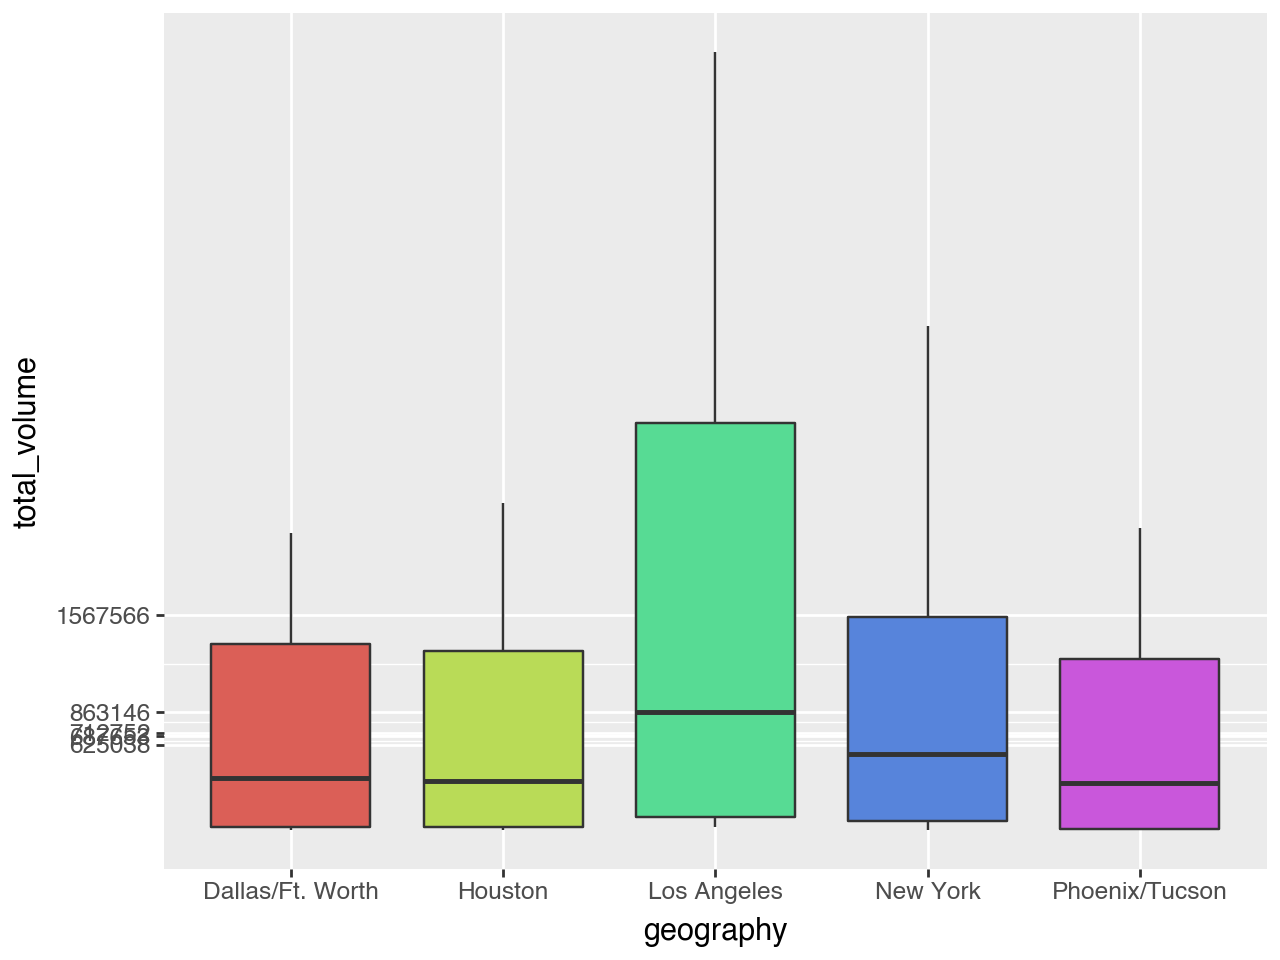

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [513]:
# version 2
(ggplot(df_avo_five_metro,aes (x = 'geography', y = 'total_volume', fill = 'geography'))
+ geom_boxplot()
+ scale_y_continuous(
    limits = (df_avo_five_metro['total_volume'].min(), df_avo_five_metro['total_volume'].max()),
    breaks = five_metro_sales_average['total_volume'],
)
+ theme(legend_position = False)
)

#### note:
I tried to adjust y-axis scales according to the sales_volumes and apply custom formats for y_axis (like in Lab 1), but the results were not much better than the above. 

FEEDBACK to the INSTRUCTOR: I spent hours trying to find a solution to this on my own (and didn't find it in the end, which was frustrating and inefficient). I would appreciate more time take during the class for the instructor to give step-by-step guidance on how to adjust data visualization scales in cases where the data ranges vary by significant proportions. While there is definitely some value in trial and error learning, these are relatively easy manipulations, which without sufficient knowledge or guidance take too much time to figure out on my own (I would like not to rely on ChatGPT to help solve every issue like this, but instead understand upfront how to address them).

The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

### 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [514]:
# creating new dataset for California regions
ca_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
avo_ca = df_avo_cities[df_avo_cities['geography'].isin(ca_regions)].reset_index()

avo_ca

,index,date,average_price,total_volume,4046_SM,4225_L,4770_XL,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,organic,datetime,day,month
0,44,2015-01-04,1,2682160,1838000,524430,64226,255504,215572,36982,2951,conventional,2015,Los Angeles,0,2015-01-04,1,1
1,45,2015-01-04,1,54496,47722,1723,0,5051,5051,0,0,organic,2015,Los Angeles,1,2015-01-04,1,1
2,80,2015-01-04,1,430139,110694,270108,9738,39600,39600,0,0,conventional,2015,Sacramento,0,2015-01-04,1,1
3,81,2015-01-04,1,9213,3728,4328,0,1158,1158,0,0,organic,2015,Sacramento,1,2015-01-04,1,1
4,82,2015-01-04,1,461607,244152,165299,15303,36853,30884,5595,374,conventional,2015,San Diego,0,2015-01-04,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,33018,2020-11-29,1,23531,3304,2057,0,18171,18145,26,0,organic,2020,Sacramento,1,2020-11-29,11,11
2444,33019,2020-11-29,1,469357,104510,19988,7210,337648,189341,127702,20605,conventional,2020,San Diego,0,2020-11-29,11,11
2445,33020,2020-11-29,2,25800,895,838,0,24067,9691,14376,0,organic,2020,San Diego,1,2020-11-29,11,11
2446,33021,2020-11-29,2,644141,128555,136718,5597,373270,159277,207760,6234,conventional,2020,San Francisco,0,2020-11-29,11,11


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [515]:
avo_ca['average_price'].unique()

array([0.85, 1.25, 1.05, 1.33, 0.94, 1.23, 0.99, 1.18, 1.08, 1.09, 1.27, 0.82, 1.03, 1.12, 0.89, 1.29, 1.22, 1.13, 1.01, 0.96, 1.19, 1.44, 1.02, 1.26, 1.21,
       1.34, 0.74, 1.04, 1.11, 0.91, 1.06, 0.9 , 0.98, 1.5 , 0.92, 1.35, 0.83, 1.43, 1.63, 1.49, 1.55, 1.36, 1.14, 1.51, 1.39, 0.75, 0.95, 0.86, 1.6 , 1.48,
       1.16, 1.56, 1.42, 1.52, 1.  , 1.2 , 1.64, 1.53, 1.3 , 0.93, 1.24, 1.65, 1.54, 1.41, 1.4 , 1.62, 0.78, 0.8 , 1.45, 1.32, 0.97, 1.37, 1.17, 0.84, 1.85,
       1.31, 1.96, 0.79, 1.81, 0.87, 1.95, 1.46, 1.82, 1.47, 1.84, 1.86, 1.59, 1.72, 1.1 , 2.09, 1.98, 1.15, 2.36, 2.12, 1.71, 1.58, 2.75, 2.1 , 1.07, 1.57,
       2.76, 1.61, 1.28, 2.17, 2.72, 2.73, 1.74, 2.71, 1.88, 2.77, 2.15, 1.66, 2.02, 2.  , 1.69, 2.79, 1.7 , 1.38, 2.74, 1.68, 2.01, 2.59, 2.66, 2.14, 1.94,
       1.9 , 1.8 , 1.87, 0.81, 1.79, 2.04, 2.58, 0.66, 0.67, 1.83, 1.92, 0.64, 0.65, 1.93, 0.76, 1.73, 1.89, 0.72, 2.3 , 0.58, 0.61, 2.37, 2.38, 2.29, 2.31,
       2.27, 2.33, 0.73, 2.07, 2.23, 2.03, 0.77, 2.05, 2.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [516]:
# summarizing the data with groupby and basic stats
avo_ca_summary = avo_ca.groupby(['geography', 'type'])['average_price'].agg(['mean', 'std', 'min', 'max']).reset_index()
print(avo_ca_summary)

       geography          type  mean  std  min  max
0    Los Angeles  conventional     1    0    1    2
1    Los Angeles       organic     2    0    1    2
2     Sacramento  conventional     1    0    1    2
3     Sacramento       organic     2    0    1    3
4      San Diego  conventional     1    0    1    2
5      San Diego       organic     2    0    1    3
6  San Francisco  conventional     1    0    1    2
7  San Francisco       organic     2    0    1    3
       geography          type  mean  std  min  max
0    Los Angeles  conventional     1    0    1    2
1    Los Angeles       organic     2    0    1    2
2     Sacramento  conventional     1    0    1    2
3     Sacramento       organic     2    0    1    3
4      San Diego  conventional     1    0    1    2
5      San Diego       organic     2    0    1    3
6  San Francisco  conventional     1    0    1    2
7  San Francisco       organic     2    0    1    3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [517]:
# pivoting data # assissted mapping pivot with ChatGPT
avo_ca_pivot = avo_ca_summary.pivot(index='geography', columns='type', values='mean').reset_index()

# estimate price difference per region
avo_ca_pivot['price_difference'] = avo_ca_pivot['organic'] - avo_ca_pivot['conventional']

print(avo_ca_pivot)

type      geography  conventional  organic  price_difference
0       Los Angeles             1        2                 1
1        Sacramento             1        2                 1
2         San Diego             1        2                 1
3     San Francisco             1        2                 1
type      geography  conventional  organic  price_difference
0       Los Angeles             1        2                 1
1        Sacramento             1        2                 1
2         San Diego             1        2                 1
3     San Francisco             1        2                 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


The average price and price difference is similar between regions when rounded.

In [518]:
# change formatting to two decimals # assisted by ChatGPT

avo_stats = avo_ca_summary.copy()

avo_stats['mean'] = avo_stats['mean'].map('{:.2f}'.format)
avo_stats['std'] = avo_stats['std'].map('{:.2f}'.format)
avo_stats['min'] = avo_stats['min'].map('{:.2f}'.format)
avo_stats['max'] = avo_stats['max'].map('{:.2f}'.format)

avo_pivot_1 = avo_ca_pivot.copy()
avo_pivot_1['conventional'] = avo_pivot_1['conventional'].map('{:.2f}'.format)
avo_pivot_1['organic'] = avo_pivot_1['organic'].map('{:.2f}'.format)
avo_pivot_1['price_difference'] = avo_pivot_1['price_difference'].map('{:.2f}'.format)

print('Average price statistic by Region and type:')
print(avo_stats)

print('\nPrice difference by region and type:')
print(avo_pivot_1)


Average price statistic by Region and type:
       geography          type  mean   std   min   max
0    Los Angeles  conventional  1.05  0.23  0.53  1.80
1    Los Angeles       organic  1.57  0.31  0.96  2.44
2     Sacramento  conventional  1.30  0.22  0.86  1.89
3     Sacramento       organic  1.87  0.29  1.13  2.82
4      San Diego  conventional  1.11  0.24  0.61  1.83
5      San Diego       organic  1.80  0.33  1.05  2.78
6  San Francisco  conventional  1.40  0.27  0.84  2.20
7  San Francisco       organic  2.12  0.40  1.06  3.25

Price difference by region and type:
type      geography conventional organic price_difference
0       Los Angeles         1.05    1.57             0.53
1        Sacramento         1.30    1.87             0.58
2         San Diego         1.11    1.80             0.68
3     San Francisco         1.40    2.12             0.72
Average price statistic by Region and type:
       geography          type  mean   std   min   max
0    Los Angeles  conventional  1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


### answer:
Based on average price difference estimates - the largest differnece in price between organic and conventional avocado is in San Francisco: $0.72.

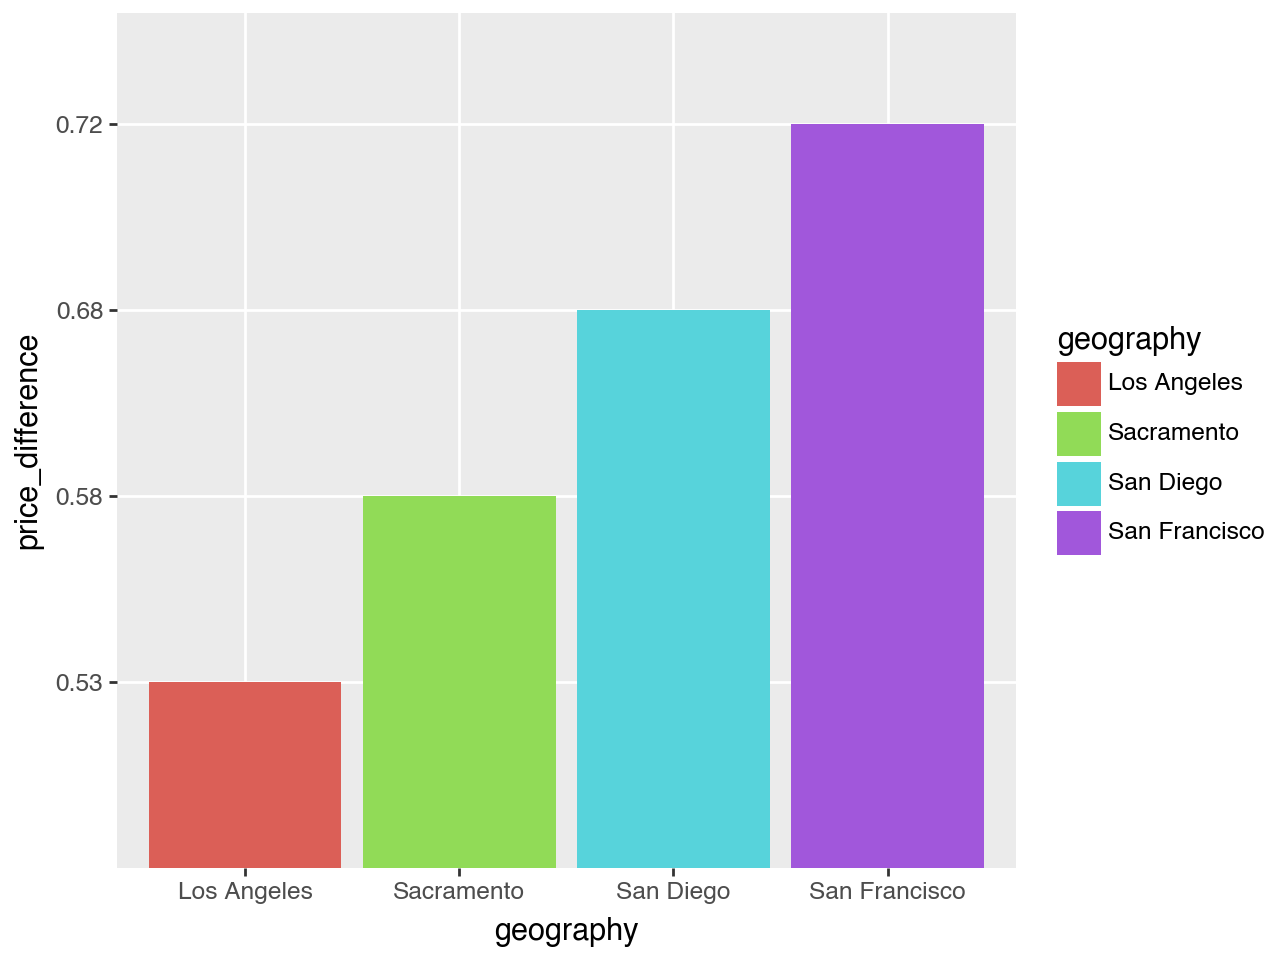

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [519]:
# visualization
(ggplot(avo_pivot_1, aes(x='geography', y='price_difference', fill = 'geography'))
+ geom_col())

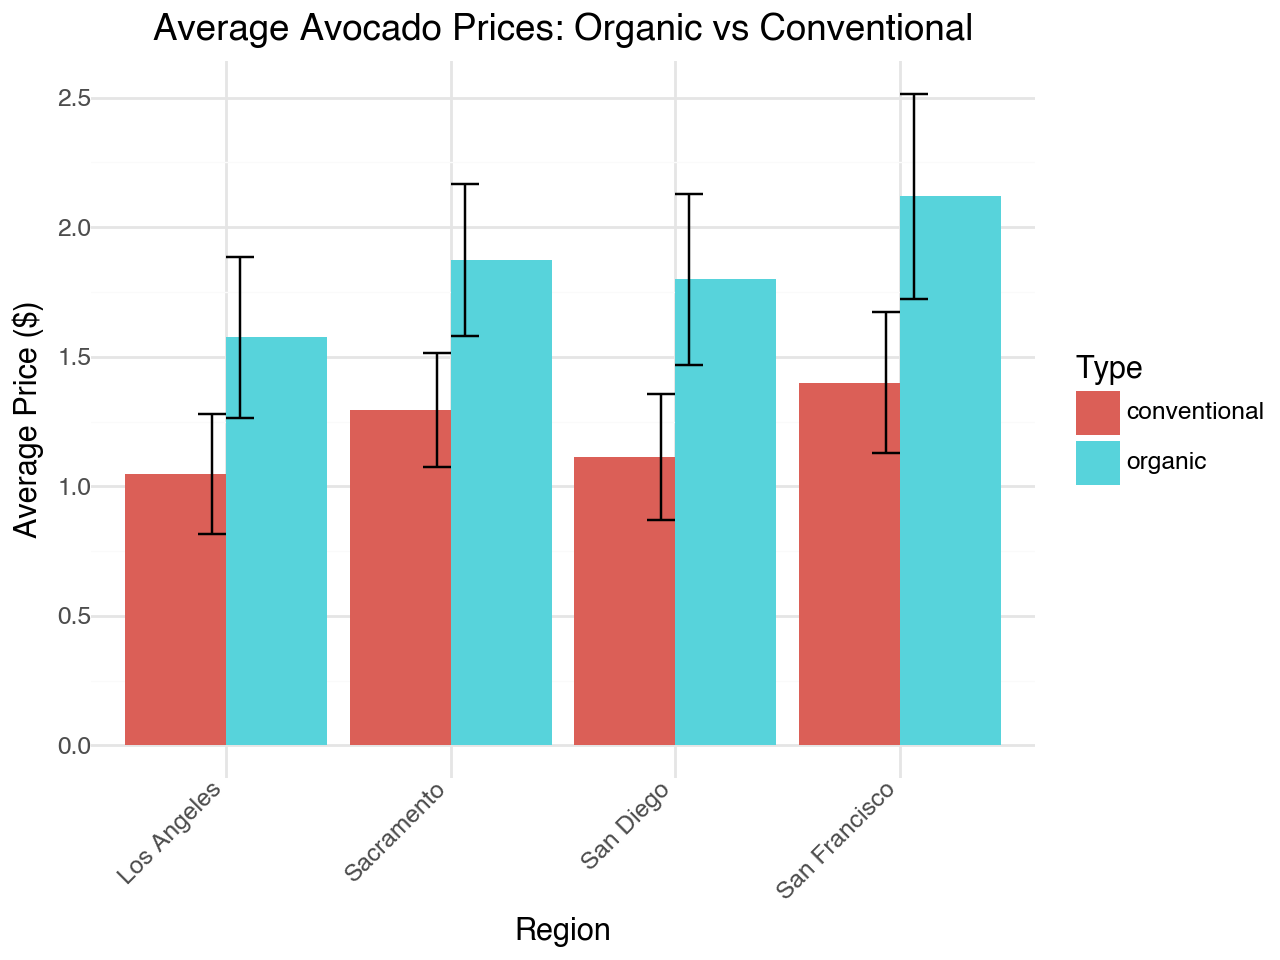

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [520]:
# alternative visualization of average price difference # assisted by ChatGPT
(ggplot(summary_stats, aes(x='geography', y='mean', fill='type')) +
     geom_bar(stat='identity', position='dodge') +
     # Error bars, using numeric values for ymin and ymax
     geom_errorbar(aes(ymin='mean - std', ymax='mean + std'), position='dodge', width=0.25) +
     labs(title='Average Avocado Prices: Organic vs Conventional',
          x='Region',
          y='Average Price ($)',
          fill='Type') +
     theme_minimal() +
     theme(axis_text_x=element_text(rotation=45, hjust=1))
    )

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [521]:
# melting data to get the bag sizes in a single column # note: assisted by ChatGPT

bags_ca = avo_ca.melt(
id_vars=['date', 'average_price', 'total_volume', 'type', 'geography'], 
value_vars=['small_bags', 'large_bags', 'xlarge_bags'],
var_name='size', 
value_name='volume')

# print(bags_ca)

# grouping by region, type, and size to calculate the total volumes
bags_grouped = bags_ca.groupby(['geography', 'type', 'size']).agg({'volume': 'sum'}).reset_index()

# Step 4: Calculate proportion of each size per region and type
bags_grouped['total_volume'] = bags_grouped.groupby(['geography', 'type'])['volume'].transform('sum')
bags_grouped['proportion'] = bags_grouped['volume'] / bags_grouped['total_volume']

print(bags_grouped)

        geography          type         size    volume  total_volume  proportion
0     Los Angeles  conventional   large_bags  54762073     404231778           0
1     Los Angeles  conventional   small_bags 324197093     404231778           1
2     Los Angeles  conventional  xlarge_bags  25272612     404231778           0
3     Los Angeles       organic   large_bags   4327894      19887800           0
4     Los Angeles       organic   small_bags  15558820      19887800           1
5     Los Angeles       organic  xlarge_bags      1086      19887800           0
6      Sacramento  conventional   large_bags   4779515      26249379           0
7      Sacramento  conventional   small_bags  20390268      26249379           1
8      Sacramento  conventional  xlarge_bags   1079597      26249379           0
9      Sacramento       organic   large_bags     11373       1321507           0
10     Sacramento       organic   small_bags   1310134       1321507           1
11     Sacramento       orga

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.



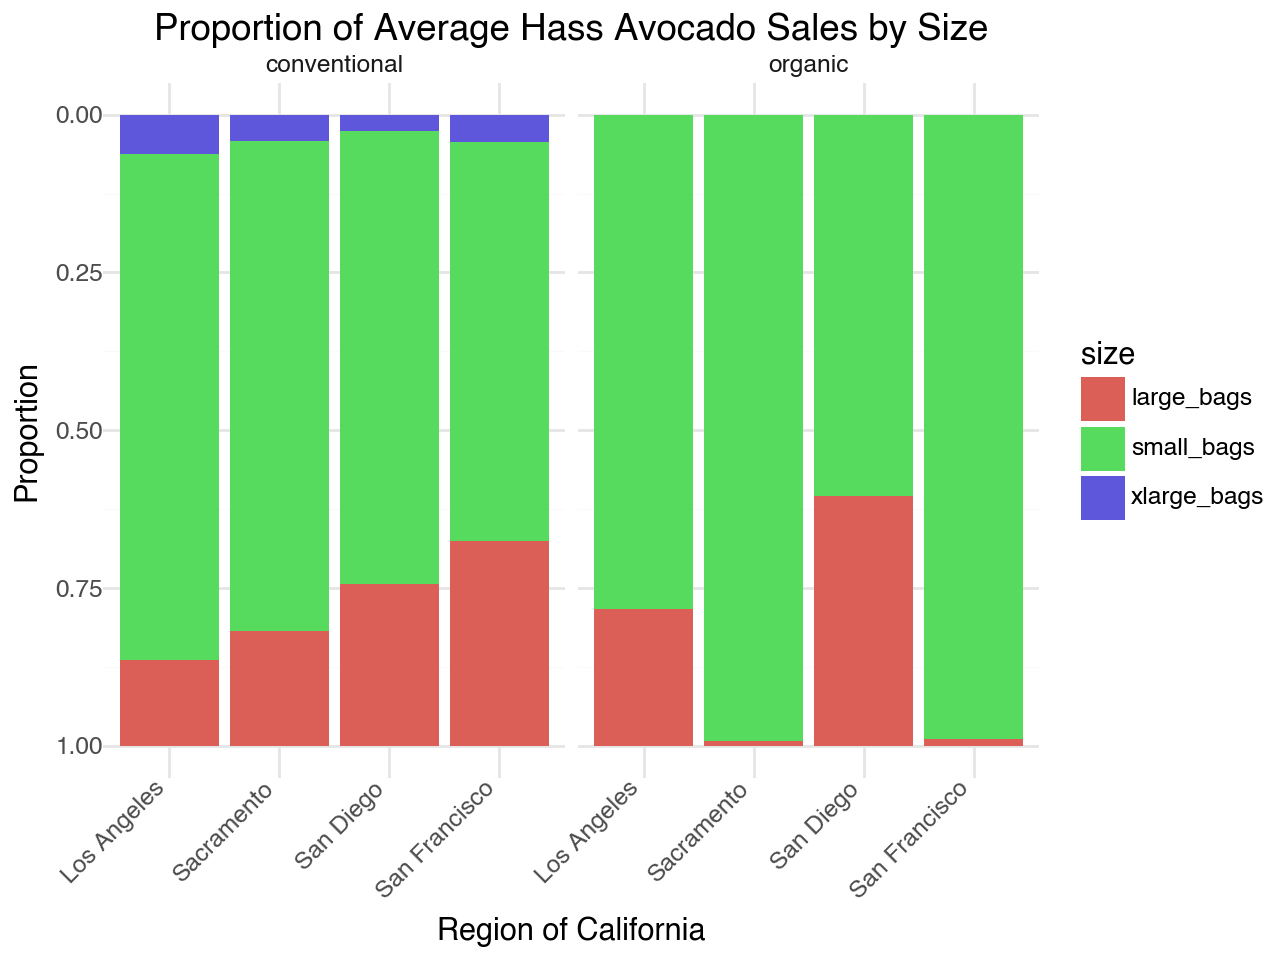

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [522]:
#  visualization # assisted by ChatGPT
(ggplot(bags_grouped, aes(x='geography', y='proportion', fill='size'))
    + geom_bar(stat='identity', position='stack')
    + facet_wrap('~type')
    + labs(title='Proportion of Average Hass Avocado Sales by Size',
        x='Region of California', y='Proportion')
    + scale_y_continuous(labels=lambda l: ["{:.0f}%".format(v * 100) for v in l]) 
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45, hjust=1)
    )
    + scale_y_reverse()
    )

## Using Outside Data

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

Answer: found house pricing data for four regions and downloaded in csv format for selected years 2015-2020
LA - https://fred.stlouisfed.org/series/ATNHPIUS06037A;
SF - https://fred.stlouisfed.org/series/ATNHPIUS06075A;
SC - https://fred.stlouisfed.org/series/ATNHPIUS06067A;
SD - https://fred.stlouisfed.org/series/ATNHPIUS06073A
configured it all in one table with base price index 100 = 2015

In [523]:
# loading 4 housing price data sets
ca_house_prices = pd.read_csv('alfredgraph.csv')
# ca_house_prices

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [524]:
# formatting house price data
ca_houses = ca_house_prices.copy()

# renaming columns to match avo regions
ca_houses = ca_houses.rename(columns={'ATNHPIUS06037A_NBD20150101_20220101':'Los Angeles','ATNHPIUS06075A_NBD20150101_20220101':'San Francisco','ATNHPIUS06067A_NBD20150101_20220101':'Sacramento','ATNHPIUS06073A_NBD20150101_20220101':'San Diego'})

# converting date to extract year column for further melting with ca_avo
ca_houses['datetime'] = pd.to_datetime(ca_houses['DATE'])
ca_houses['year'] = ca_houses['datetime'].dt.year

#ca_houses.info()

# filtering 2014 from the data
ca_houses_2015_2020 = ca_houses[ca_houses['year']!=2014].reset_index()
print(ca_houses_2015_2020)

   index        DATE  Los Angeles  San Francisco  Sacramento  San Diego   datetime  year
0      1  2015-01-01          100            100         100        100 2015-01-01  2015
1      2  2016-01-01          108            111         109        107 2016-01-01  2016
2      3  2017-01-01          115            116         120        115 2017-01-01  2017
3      4  2018-01-01          123            125         128        122 2018-01-01  2018
4      5  2019-01-01          127            127         133        125 2019-01-01  2019
5      6  2020-01-01          131            117         140        130 2020-01-01  2020
   index        DATE  Los Angeles  San Francisco  Sacramento  San Diego   datetime  year
0      1  2015-01-01          100            100         100        100 2015-01-01  2015
1      2  2016-01-01          108            111         109        107 2016-01-01  2016
2      3  2017-01-01          115            116         120        115 2017-01-01  2017
3      4  2018-01-01 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [525]:
# transforming melted dataset # assisted by ChatGPT
ca_houses_t = ca_houses_2015_2020.melt(id_vars=['year'], 
    value_vars=['Los Angeles', 'San Francisco', 'Sacramento', 'San Diego'], 
    var_name='geography', value_name='house_price_index')

print(ca_houses_t)

    year      geography  house_price_index
0   2015    Los Angeles                100
1   2016    Los Angeles                108
2   2017    Los Angeles                115
3   2018    Los Angeles                123
4   2019    Los Angeles                127
5   2020    Los Angeles                131
6   2015  San Francisco                100
7   2016  San Francisco                111
8   2017  San Francisco                116
9   2018  San Francisco                125
10  2019  San Francisco                127
11  2020  San Francisco                117
12  2015     Sacramento                100
13  2016     Sacramento                109
14  2017     Sacramento                120
15  2018     Sacramento                128
16  2019     Sacramento                133
17  2020     Sacramento                140
18  2015      San Diego                100
19  2016      San Diego                107
20  2017      San Diego                115
21  2018      San Diego                122
22  2019   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


At this point we have data for four CA areas regarding annual house price growth since 2015 (base = 100) to 2020.
Next step, format the ca_avo data to annual and base index of total sales volume (rather than price) to make it comparable to the house price data in four cities

In [526]:
# deriving base data from avocado sales dataset
ca_avo_volume = avo_ca.groupby(['geography', 'year'])['total_volume'].sum().reset_index()
# print(ca_avo_volume)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [527]:
# adding column for 2015 as base for the 'total_volume growth index', assisted by ChatGPT
ca_avo_volume['base_2015'] = ca_avo_volume.groupby('geography')['total_volume'].transform(lambda x: x.loc[ca_avo_volume['year'] == 2015].values[0])

# calculating growth index
ca_avo_volume['avo_sales_growth'] = (ca_avo_volume['total_volume'] / ca_avo_volume['base_2015']) * 100

# print(ca_avo_volume)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [528]:
# merging the data on house_price_index and avo_sales_growth

ca_avo_houses = pd.merge(ca_avo_volume, ca_houses_t, on=['geography', 'year'])
print(ca_avo_houses)

# now we have comparable (same scale) figures on total avocado sales and house prices per region

        geography  year  total_volume  base_2015  avo_sales_growth  house_price_index
0     Los Angeles  2015     148220693  148220693               100                100
1     Los Angeles  2016     163142303  148220693               110                108
2     Los Angeles  2017     158481174  148220693               107                115
3     Los Angeles  2018     150961957  148220693               102                123
4     Los Angeles  2019     163162614  148220693               110                127
5     Los Angeles  2020     175381748  148220693               118                131
6      Sacramento  2015      21980538   21980538               100                100
7      Sacramento  2016      23123030   21980538               105                109
8      Sacramento  2017      23192429   21980538               106                120
9      Sacramento  2018      26620608   21980538               121                128
10     Sacramento  2019      26024338   21980538      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [529]:
# melting data for visualization 1 # assisted by ChatGPT
ca_melted = ca_avo_houses.melt(id_vars=['geography', 'year'], value_vars=['avo_sales_growth', 'house_price_index'],
                    var_name='Metric', value_name='Growth_Index')
print(ca_melted)

        geography  year             Metric  Growth_Index
0     Los Angeles  2015   avo_sales_growth           100
1     Los Angeles  2016   avo_sales_growth           110
2     Los Angeles  2017   avo_sales_growth           107
3     Los Angeles  2018   avo_sales_growth           102
4     Los Angeles  2019   avo_sales_growth           110
5     Los Angeles  2020   avo_sales_growth           118
6      Sacramento  2015   avo_sales_growth           100
7      Sacramento  2016   avo_sales_growth           105
8      Sacramento  2017   avo_sales_growth           106
9      Sacramento  2018   avo_sales_growth           121
10     Sacramento  2019   avo_sales_growth           118
11     Sacramento  2020   avo_sales_growth           129
12      San Diego  2015   avo_sales_growth           100
13      San Diego  2016   avo_sales_growth           110
14      San Diego  2017   avo_sales_growth           102
15      San Diego  2018   avo_sales_growth            99
16      San Diego  2019   avo_s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


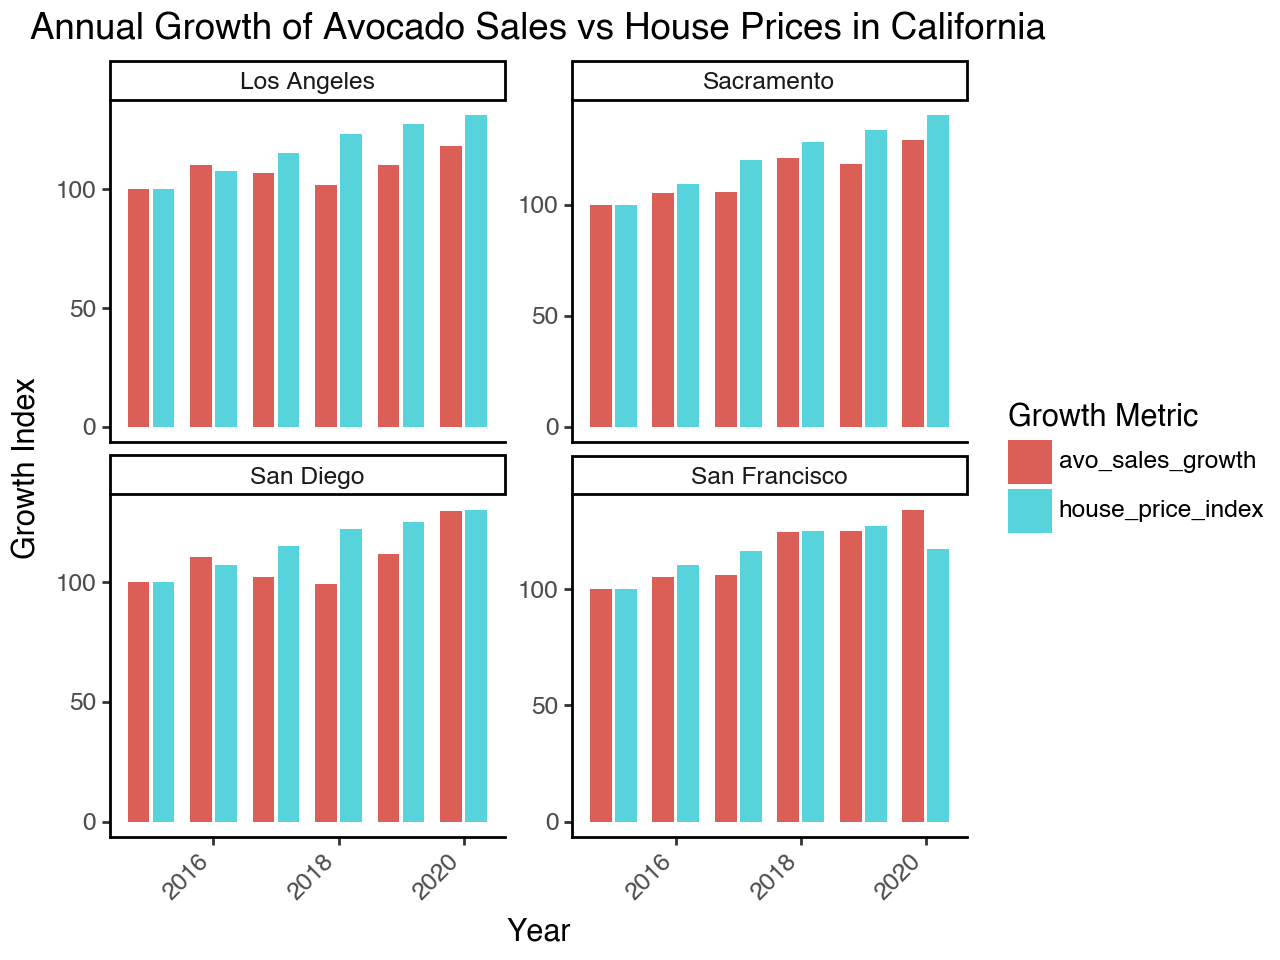

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [530]:
# visualization 1 - annual growth of avocado sales and house prices by city # assisted by ChatGPT
(ggplot(ca_melted, aes(x='year', y='Growth_Index', fill='Metric'))
+ geom_bar(stat='identity', position=position_dodge(width=0.8), width=0.7)
+ facet_wrap('~geography', scales='free_y')  #  separate plots for each geography
+ labs(title='Annual Growth of Avocado Sales vs House Prices in California',
        x='Year',
        y='Growth Index',
        fill='Growth Metric')
+ theme_classic()
+ theme(axis_text_x=element_text(rotation=45, hjust=1)) 
)

# note: tried to scale y-axis values to start at level 80 with: + scale_y_continuous(limits=(80, None)), but it didn't work (now bars appeared on the plot).


In [531]:
# measuring correlations between 'avo sales growth' and 'house prices growth' # assisted by ChatGPT
avo_house_correl = ca_avo_houses.groupby('geography').apply(lambda x: x['avo_sales_growth'].corr(x['house_price_index']))
# creating dataframe of correlation with two decimal point format
avo_house_correl_df = avo_house_correl.reset_index(name='avo_sales_and_house_prices_correlation')
avo_house_correl_df['avo_sales_and_house_prices_correlation'] = avo_house_correl_df['avo_sales_and_house_prices_correlation'].map('{:.2f}'.format)

print(avo_house_correl_df)

       geography avo_sales_and_house_prices_correlation
0    Los Angeles                                   0.62
1     Sacramento                                   0.94
2      San Diego                                   0.61
3  San Francisco                                   0.75
       geography avo_sales_and_house_prices_correlation
0    Los Angeles                                   0.62
1     Sacramento                                   0.94
2      San Diego                                   0.61
3  San Francisco                                   0.75


<positron-console-cell-531>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


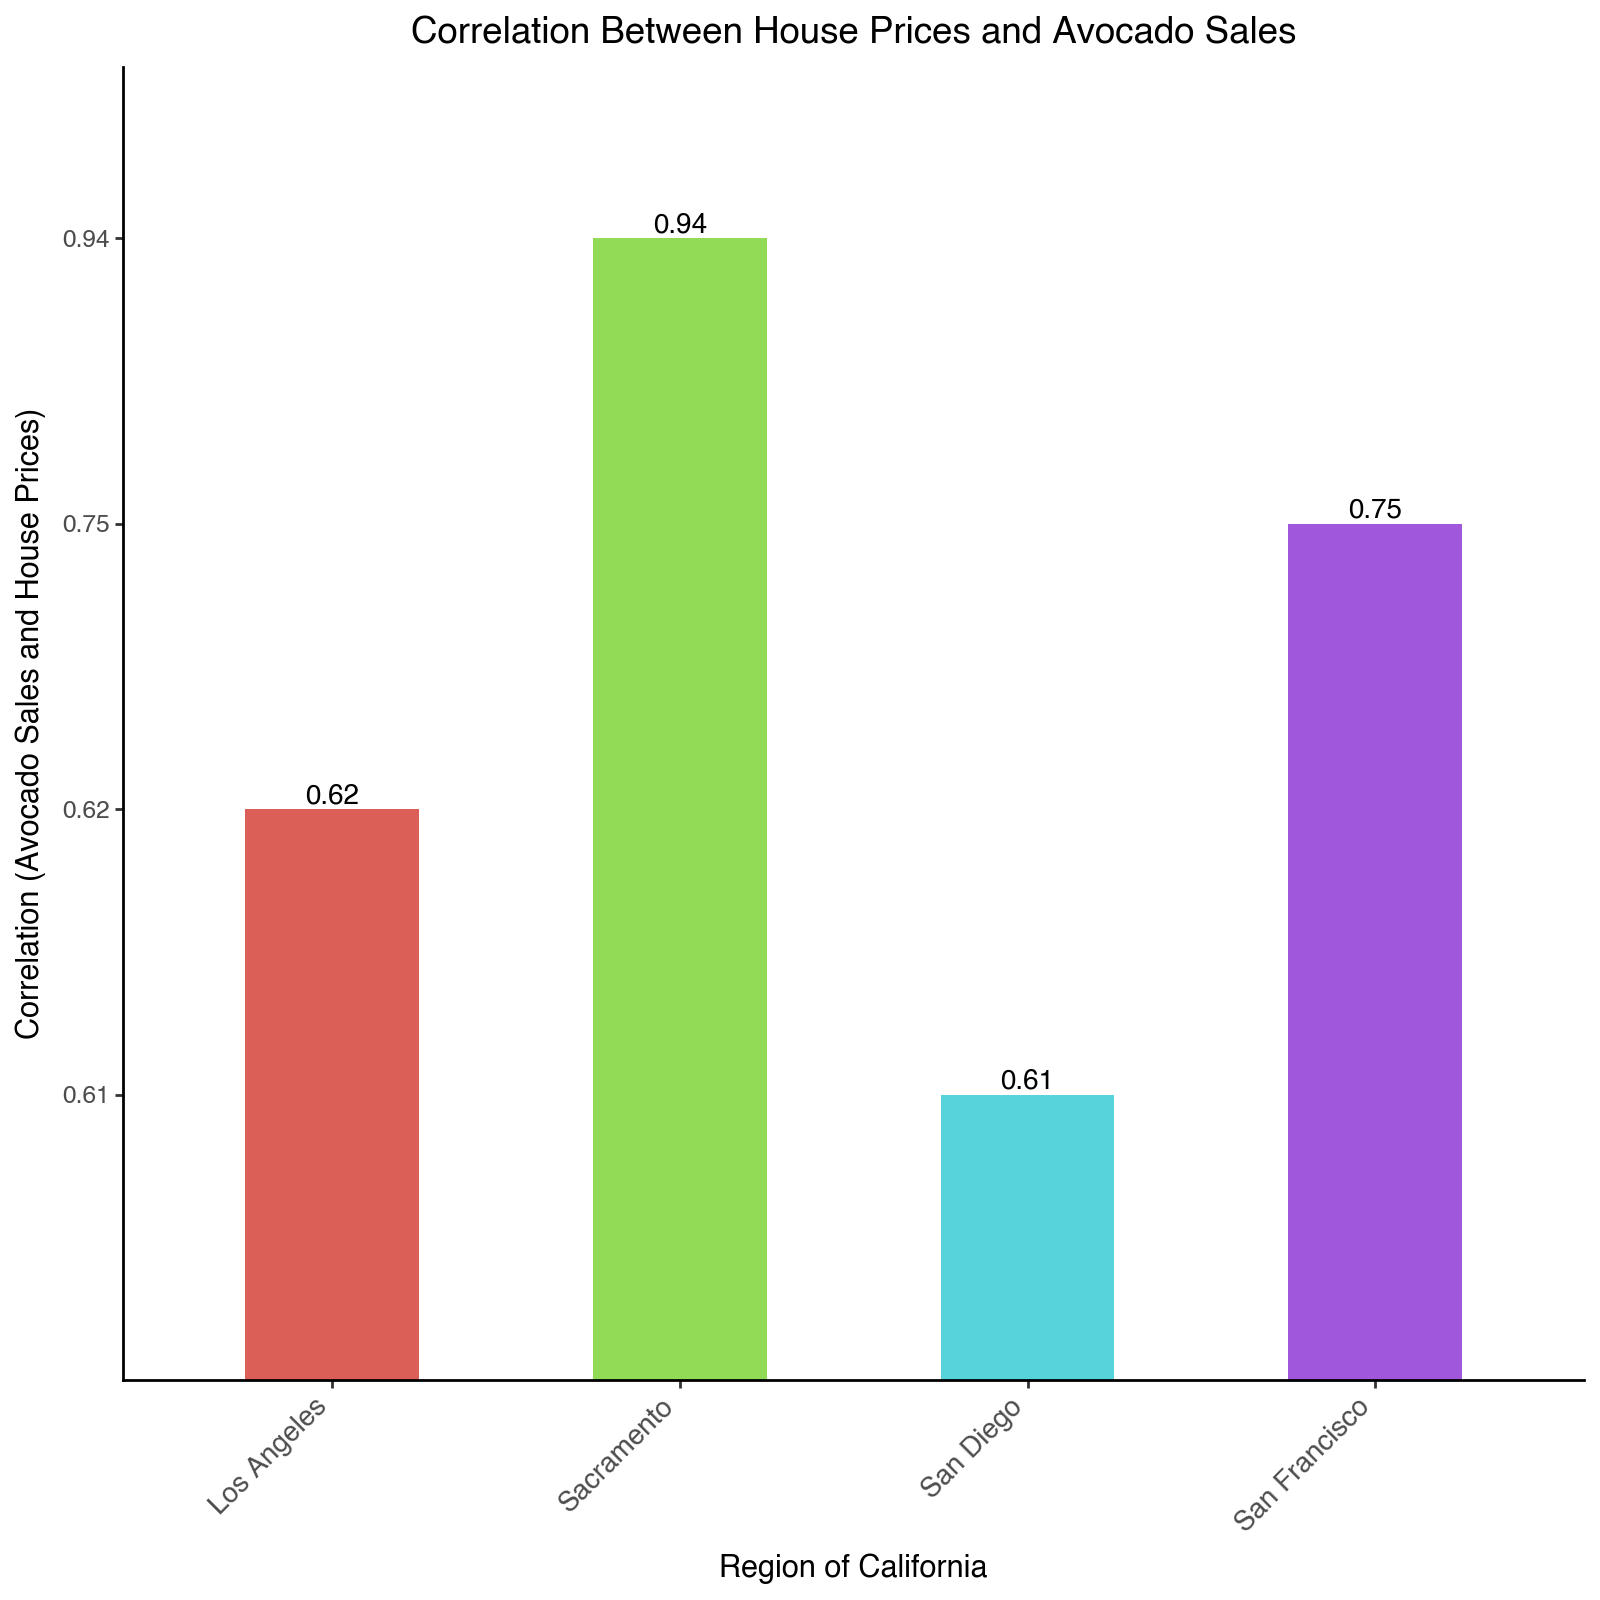

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [532]:
# visualization 2 - correlation between house prices and total avocado sales volume # assisted by ChatGPT
(ggplot(avo_house_correl_df, aes(x='geography', y='avo_sales_and_house_prices_correlation', fill='geography'))
+ geom_bar(stat='identity', width=0.5)
+ geom_text(aes(label=round(avo_house_correl_df['avo_sales_and_house_prices_correlation'], 2)), 
     va='bottom', size=10) 
+ labs(title='Correlation Between House Prices and Avocado Sales',
          x='Region of California', 
          y='Correlation (Avocado Sales and House Prices)')
+ theme_classic()
+ theme(legend_position='none',
          axis_text_x=element_text(rotation=45, ha='right', size=10),
          figure_size=(8, 8))
    )

### Summary
Based on the analysis of annual house price index and avocado volume sales per region in California, you can see that both experience growth since 2015, with the highest correlation in Sacramento (0.94) and the lowest in San Diego (0.61). While this shows a common growth trend for both house prices and avocado sales in these regions of California it is not sufficient to conclude how one impacts the other, given this limited data.